In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("/content/student_clustering.csv")
df.shape

(200, 2)

In [3]:
df.head()

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


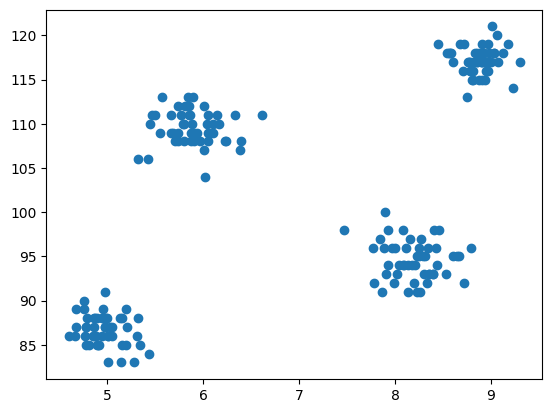

In [4]:
import matplotlib.pyplot as plt
plt.scatter(df['cgpa'],df['iq'])

In [6]:
from sklearn.cluster import KMeans

In [7]:
wcss = []

for i in range(1,11):
  km = KMeans(n_clusters=i)
  km.fit_predict(df)
  wcss.append(km.inertia_)

In [8]:
wcss

[29957.898287999997,
 4184.141269999999,
 2362.7133490000015,
 681.9696600000001,
 590.841298,
 445.30421453933366,
 362.3996021583654,
 294.938081615779,
 214.20061220268616,
 182.04693704953448]

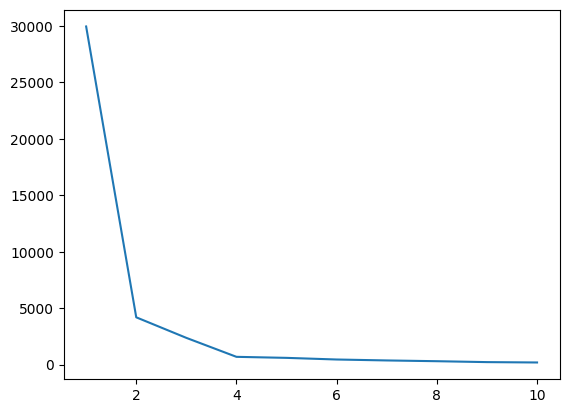

In [9]:
plt.plot(range(1,11),wcss)

In [11]:
X = df.iloc[:,:].values
km = KMeans(n_clusters=4)
y_means = km.fit_predict(X)

In [13]:
y_means

array([0, 3, 2, 2, 3, 3, 2, 1, 3, 2, 0, 3, 2, 0, 3, 2, 3, 2, 3, 3, 2, 0,
       2, 0, 0, 2, 0, 1, 2, 3, 1, 3, 1, 3, 2, 2, 1, 3, 0, 3, 0, 2, 2, 0,
       1, 1, 2, 3, 1, 3, 0, 0, 1, 2, 1, 3, 3, 1, 3, 1, 3, 2, 2, 1, 0, 1,
       2, 0, 3, 2, 3, 1, 2, 0, 3, 1, 3, 1, 0, 2, 2, 1, 3, 0, 1, 0, 1, 3,
       1, 3, 1, 1, 2, 0, 2, 2, 1, 2, 0, 1, 3, 0, 0, 1, 0, 0, 2, 0, 1, 1,
       2, 1, 3, 3, 2, 1, 2, 3, 1, 0, 0, 3, 2, 1, 2, 0, 2, 3, 0, 2, 2, 3,
       0, 0, 3, 1, 3, 0, 2, 2, 2, 0, 3, 0, 0, 1, 0, 1, 3, 0, 1, 0, 1, 1,
       0, 2, 3, 1, 3, 2, 0, 1, 3, 2, 1, 0, 3, 0, 0, 1, 1, 3, 1, 0, 0, 2,
       1, 3, 0, 1, 1, 3, 3, 3, 2, 0, 2, 2, 1, 3, 2, 2, 0, 0, 2, 0, 1, 3,
       3, 1], dtype=int32)

In [17]:
X[y_means == 2,1]

array([ 93.,  97.,  98.,  94.,  97.,  95.,  91.,  98.,  92.,  98.,  94.,
        96.,  96.,  96.,  93.,  94.,  96.,  96.,  95.,  93.,  95.,  94.,
        92.,  91.,  92.,  95.,  94.,  95.,  92.,  94.,  91.,  95.,  93.,
        97.,  98.,  96.,  93., 100.,  96.,  94.,  95.,  93.,  92.,  98.,
        96.,  93.,  91.,  93.,  94.,  96.])

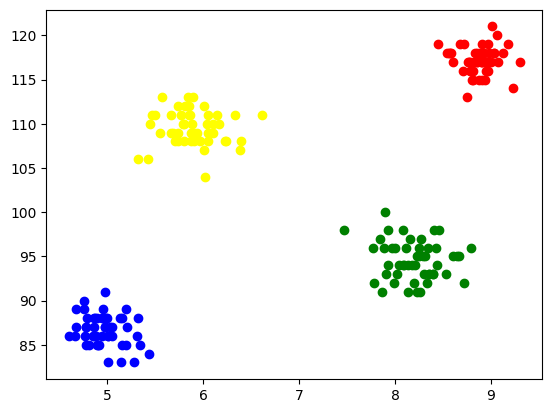

In [18]:
plt.scatter(X[y_means == 0,0],X[y_means == 0,1], color='blue')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1], color='red')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1], color='green')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1], color='yellow')

K-Means on 3-D Data

In [19]:
from sklearn.datasets import make_blobs

centroids = [(-5,-5,-5),(5,5,-5),(3.5,-2.5,4),(-2.5,2.5,-4)]
cluster_std = [1,1,1,1]

X,y = make_blobs(n_samples=200,cluster_std=cluster_std,centers=centroids,n_features=3,random_state=1)

In [20]:
X

array([[ 4.33424548,  3.32580419, -4.17497018],
       [-3.32246719,  3.22171129, -4.625342  ],
       [-6.07296862, -4.13459237, -7.3015387 ],
       [ 6.90465871,  6.1110567 , -4.3409502 ],
       [-2.60839207,  2.95015551, -2.2346649 ],
       [ 5.88490881,  4.12271848, -5.86778722],
       [-4.68484061, -4.15383935, -5.85951594],
       [-1.82542929,  3.96089238, -3.4075272 ],
       [-5.34385368, -4.95640314, -5.62000084],
       [ 4.91549197,  4.70263812, -4.582698  ],
       [-3.80108212, -4.81484358, -5.37528495],
       [ 4.6735005 ,  3.65732421, -3.88561702],
       [-6.23005814, -4.4494625 , -4.20719313],
       [-3.90232915,  2.95112294, -4.6949209 ],
       [ 3.72744124,  5.31354772, -4.49681519],
       [-3.3088472 ,  3.05743945, -3.81896126],
       [ 2.70273021, -2.21732429,  3.17390257],
       [ 4.06438286, -0.36217193,  3.214466  ],
       [ 4.69268607, -2.73794194,  5.15528789],
       [ 4.1210827 , -1.5438783 ,  3.29415949],
       [-6.61577235, -3.87858229, -4.591

In [22]:
import plotly.express as px
fig = px.scatter_3d(x=X[:,0],y=X[:,1],z=X[:,2])
fig.show()

In [30]:
wcss = []

for i in range(1,21):
  km = KMeans(n_clusters=i)
  km.fit_predict(X)
  wcss.append(km.inertia_)

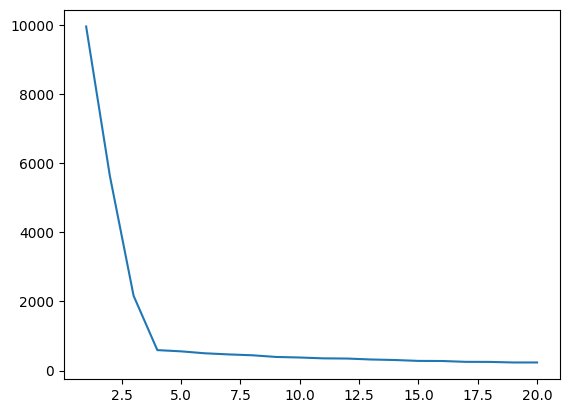

In [31]:
plt.plot(range(1,21),wcss)

In [32]:
km = KMeans(n_clusters=4)
y_pred = km.fit_predict(X)


In [33]:
df = pd.DataFrame()

df['col1'] = X[:,0]
df['col2'] = X[:,1]
df['col3'] = X[:,2]
df['label'] = y_pred

In [35]:
fit = px.scatter_3d(df,x='col1', y='col2', z='col3', color='label')
fit.show()